In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme()
asie_energy = pd.read_csv('../BDD/asie.csv', sep=';')
asie_gdp = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')
asie_gdp = asie_gdp[asie_gdp.Entity == 'South and South-East Asia']
asie = pd.merge(asie_energy, asie_gdp, on=['Year'])
asia_pop = pd.read_csv('../BDD/population.csv')
asia_pop= asia_pop[asia_pop.Entity =='Asia']
asie = pd.merge(asia_pop, asie, on=['Year'])

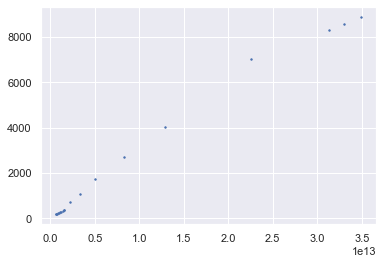

In [2]:
year = asie['Year']
energy = asie['Energy (Mtep)']
gdpc = asie['GDP per capita']
pop = asie['Total population (Gapminder, HYDE & UN)']
gdp = gdpc*pop
plt.scatter(gdp, energy, s=2)

Text(0, 0.5, 'Energy (MTep)')

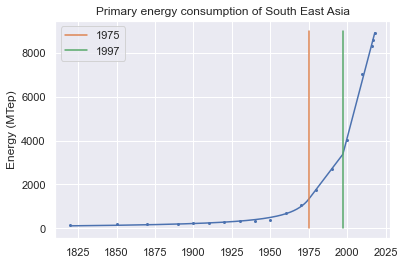

In [3]:
plt.scatter(year, energy, s=4)
yplot = np.linspace(year.min(), year.max(), 200)
b,c,d,f,x1,x2 = reg.hypLinLin(year, energy, p0=(0.2*100000, 1992, 110,275,  1980, 2000))
plt.plot(yplot, reg.hyp_lin_lin(yplot, b,c,d,f,x1,x2))
plt.plot([x1, x1], [0, 9000], label = str(int(x1)))
plt.plot([x2, x2], [0, 9000], label = str(int(x2)))
plt.legend()
plt.title("Primary energy consumption of South East Asia")
plt.ylabel('Energy (MTep)')

Text(0, 0.5, 'GDP (10e13 $)')

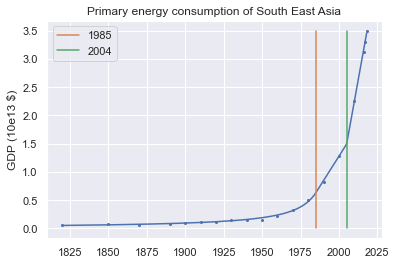

In [4]:
plt.scatter(year, gdp/10**13, s=4)
# plt.plot(yplot, reg.hyp_lin_lin(yplot,0.08*100, 1996, 0.04,0.12,  1980, 2000))
b,c,d,f,x1,x2 = reg.hypLinLin(year, gdp/10**13, p0=(0.08*100, 1996, 0.04,0.12,  1980, 2000))
plt.plot(yplot, reg.hyp_lin_lin(yplot, b,c,d,f,x1,x2))
plt.plot([x1, x1], [0, 3.5], label = str(int(x1)))
plt.plot([x2, x2], [0, 3.5], label = str(int(x2)))
plt.legend()
plt.title("Primary energy consumption of South East Asia")
plt.ylabel('GDP (10e13 $)')


(0.150284526629376, 0.369, 9.999725341796875, 0.3553008058107437, 0.3052675802513069, 0.02691696682234886)


Text(0, 0.5, 'Energy (kTep)')

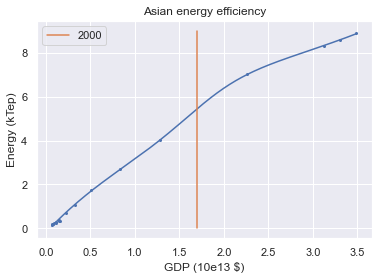

In [5]:
e = energy/10**3
g = gdp/10**13
gplot = np.linspace(g.min(), g.max(),200 )
G_i, E_i, A, alpha_1, alpha_2, alpha_3 = reg.sReg(g, e, Dy=None, bounds = [-1, 15])
plt.plot(gplot, reg.s_model(gplot, G_i, E_i, A, alpha_1, alpha_2, alpha_3))
plt.scatter(g,e, s=4)
dist_infl = np.array([abs(g[i]-G_i) for i in range(len(g))])
infl_year = year[dist_infl.argmin()]
plt.plot([G_i, G_i], [0,9], label=str(infl_year))
plt.legend()
plt.title("Asian energy efficiency")
plt.xlabel('GDP (10e13 $)')
plt.ylabel('Energy (kTep)')





1.6954709446716028

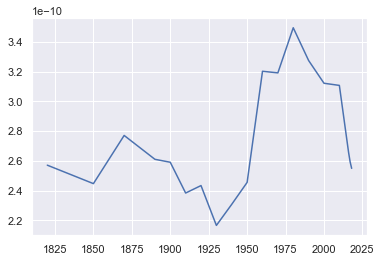

In [7]:
plt.plot(year, energy/gdp)